In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***`Libraries`***

In [30]:
!pip install --upgrade mlxtend

In [31]:
from mlxtend.frequent_patterns import fpgrowth
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN


In [32]:
import warnings
warnings.filterwarnings("ignore")

# ***`EDA`***

In [33]:
df_cleaned = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NCKH (Ph. Danh Hường)/Data thô/data_cleaned.xlsx')
df_cleaned.head(2)

,Name_Shop,revenue,positive,negative,Year_Joined,Shop_Rating,Counter_Rating,Followers,Chat Resopnse
0,2N Unisex,1326000,233,46,5,4.7,1100,982,0
1,3M Automotive Official,25545495,312,104,4,4.7,1400,1500,0


In [34]:
null_values = df_cleaned.isnull().sum()
print(null_values)

Name_Shop         0
revenue           0
positive          0
negative          0
Year_Joined       0
Shop_Rating       0
Counter_Rating    0
Followers         0
Chat Resopnse     0
dtype: int64


In [35]:
df_cleaned['total_feedback'] = df_cleaned['positive'] + df_cleaned['negative']
df_cleaned['positive'] = df_cleaned['positive'] / df_cleaned['total_feedback']
df_cleaned['negative'] = df_cleaned['negative'] / df_cleaned['total_feedback']
df_cleaned['Chat Resopnse'] = df_cleaned['Chat Resopnse'] / 100

In [36]:
df_cleaned.fillna(0, inplace=True)

In [37]:
df_cleaned['Year_Joined'] = df_cleaned['Year_Joined'].replace(0, 1)
df_cleaned = df_cleaned[df_cleaned['Counter_Rating'] != 0]

In [38]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 933 entries, 0 to 943
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name_Shop       933 non-null    object 
 1   revenue         933 non-null    int64  
 2   positive        933 non-null    float64
 3   negative        933 non-null    float64
 4   Year_Joined     933 non-null    int64  
 5   Shop_Rating     933 non-null    float64
 6   Counter_Rating  933 non-null    int64  
 7   Followers       933 non-null    int64  
 8   Chat Resopnse   933 non-null    float64
 9   total_feedback  933 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 80.2+ KB


# ***`Describe`***

In [39]:
df_copy_temp =  df_cleaned.copy()

In [40]:
df_copy_temp.describe()

,revenue,positive,negative,Year_Joined,Shop_Rating,Counter_Rating,Followers,Chat Resopnse,total_feedback
count,9.330000e+02,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,4.443773e+07,0.778953,0.214616,5.403001,4.572133,3063.650589,1407.422294,0.349400,390.986066
std,1.319756e+08,0.111380,0.093661,1.442931,0.237104,4919.850728,2965.526020,0.426577,533.593376
min,0.000000e+00,0.000000,0.000000,1.000000,2.500000,1.000000,1.000000,0.000000,0.000000
25%,1.712999e+06,0.733858,0.163265,4.000000,4.500000,356.000000,140.000000,0.000000,62.000000
50%,7.390000e+06,0.792593,0.206349,6.000000,4.600000,1300.000000,479.000000,0.000000,198.000000
75%,2.980900e+07,0.835821,0.263598,7.000000,4.700000,3300.000000,1395.000000,0.830000,490.000000
max,2.792880e+09,1.000000,1.000000,8.000000,5.000000,38000.000000,36317.000000,1.000000,3670.000000


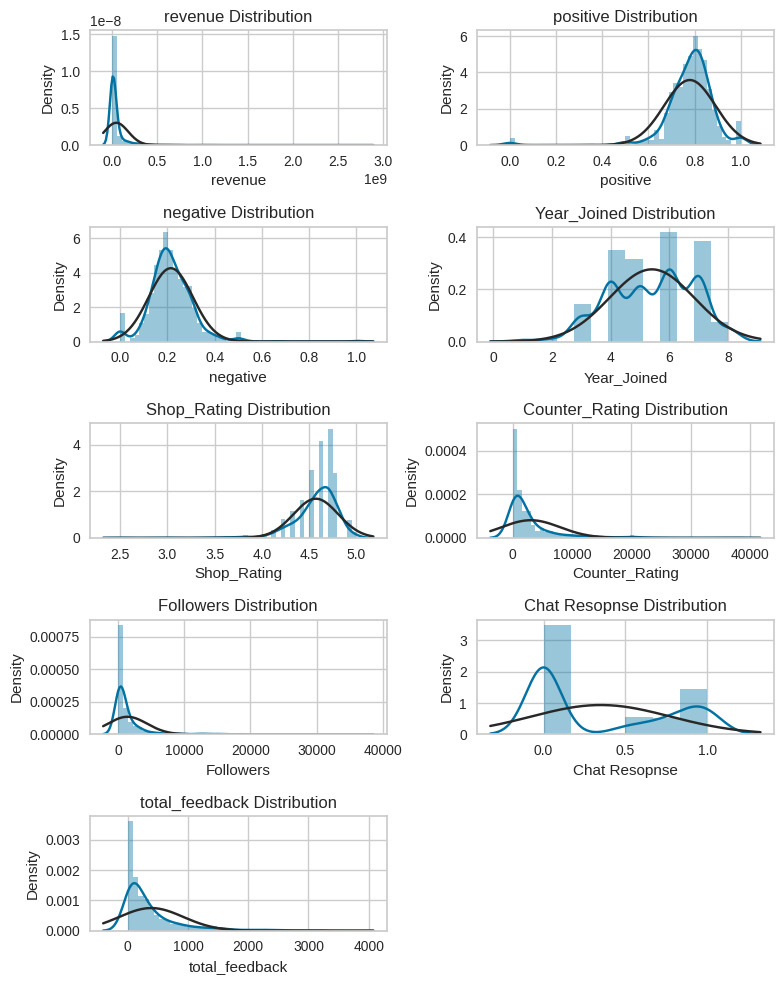

In [41]:
import scipy.stats as stats

# Visualize the distribution of each variable.
plt.figure(figsize=(8, 10))
for i, j in enumerate(df_copy_temp.describe().columns):
    plt.subplot(5,2, i+1)
    sns.distplot(x=df_copy_temp[j], fit = stats.norm)
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.tight_layout()
plt.show()

# ***`Xử lý outliers bằng Winsorization`***

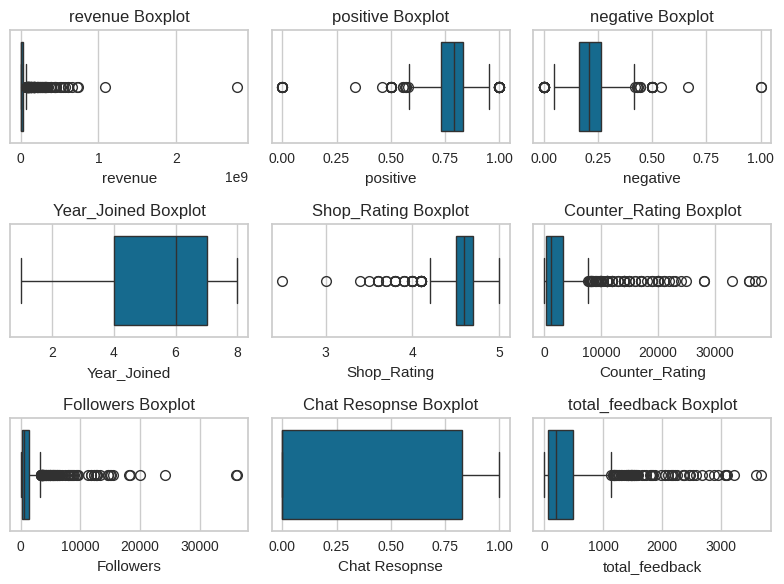

In [42]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(8, 6))
for i, j in enumerate(df_copy_temp.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df_copy_temp[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

In [43]:
# Hàm Winsorization cho các cột được chọn
def winsorize_columns(df, columns, lower_percentile=0.05, upper_percentile=0.95):
    for col in columns:
        df[col] = stats.mstats.winsorize(df[col], limits=[lower_percentile, 1-upper_percentile])
    return df

# Các cột cần Winsorization
columns_to_winsorize = ['revenue', 'Counter_Rating', 'Followers', 'positive', 'negative', "Shop_Rating", 'total_feedback']

# Áp dụng Winsorization cho các cột được chọn
df_copy_temp = winsorize_columns(df_copy_temp, columns_to_winsorize)

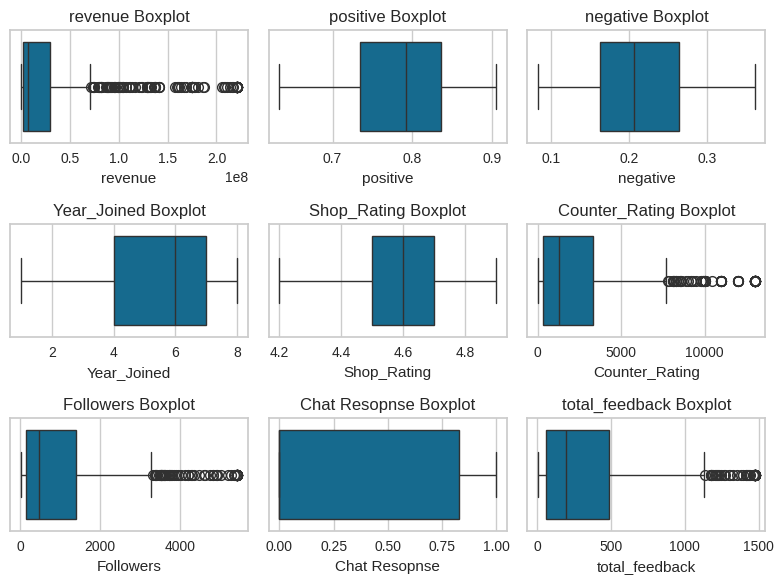

In [44]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(8, 6))
for i, j in enumerate(df_copy_temp.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df_copy_temp[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

# ***`Log Transformation`***

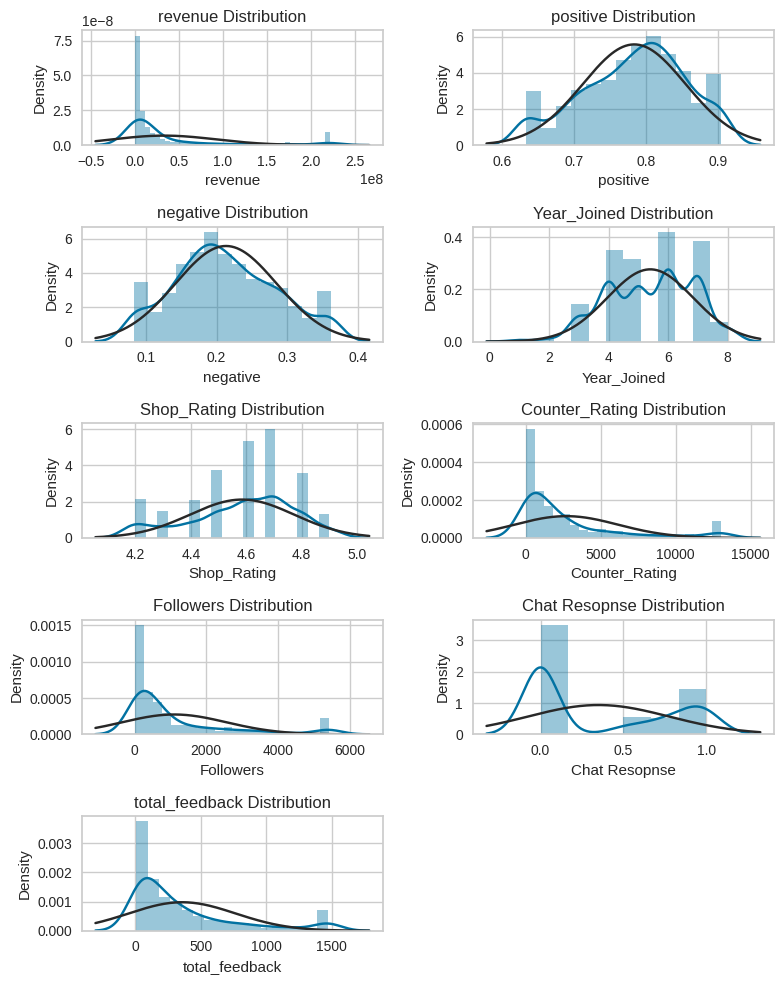

In [45]:
# Visualize the distribution of each variable.
plt.figure(figsize=(8, 10))
for i, j in enumerate(df_copy_temp.describe().columns):
    plt.subplot(5,2, i+1)
    sns.distplot(x=df_copy_temp[j], fit = stats.norm)
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.tight_layout()
plt.show()


In [46]:
df_copy_temp_log = df_copy_temp
df_copy_temp_log[['revenue', 'Counter_Rating', 'Followers', 'total_feedback']] = df_copy_temp[['revenue', 'Counter_Rating', 'Followers', 'total_feedback']].apply(lambda x: np.log(x + 1))
df_copy_temp_log.describe()

,revenue,positive,negative,Year_Joined,Shop_Rating,Counter_Rating,Followers,Chat Resopnse,total_feedback
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,14.771384,0.784128,0.213249,5.403001,4.584995,6.952511,6.043693,0.349400,5.076149
std,4.657357,0.071487,0.071660,1.442931,0.188483,1.594492,1.560917,0.426577,1.466638
min,0.000000,0.633484,0.083333,1.000000,4.200000,3.663562,3.044522,0.000000,2.079442
25%,14.353757,0.733858,0.163265,4.000000,4.500000,5.877736,4.948760,0.000000,4.143135
50%,15.815638,0.792593,0.206349,6.000000,4.600000,7.170888,6.173786,0.000000,5.293305
75%,17.210321,0.835821,0.263598,7.000000,4.700000,8.101981,7.241366,0.830000,6.196444
max,19.214890,0.904762,0.361111,8.000000,4.900000,9.472782,8.600799,1.000000,7.295735


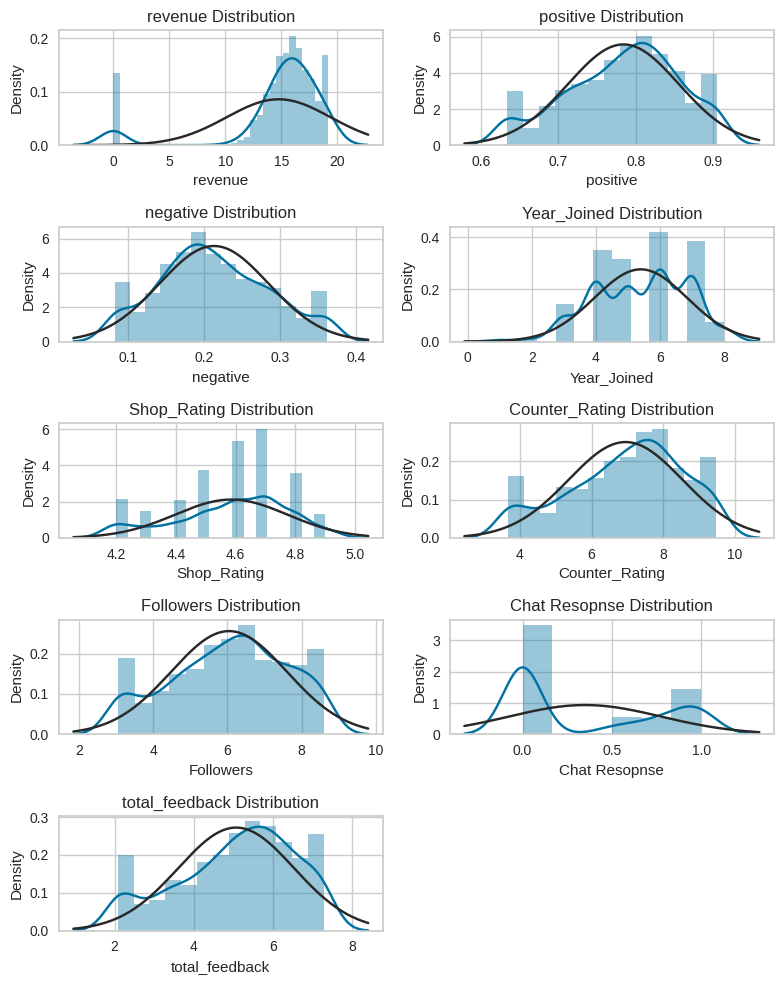

In [47]:
# Visualize the distribution of each variable.
plt.figure(figsize=(8, 10))
for i, j in enumerate(df_copy_temp_log.describe().columns):
    plt.subplot(5,2, i+1)
    sns.distplot(x=df_copy_temp_log[j], fit = stats.norm)
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.tight_layout()
plt.show()


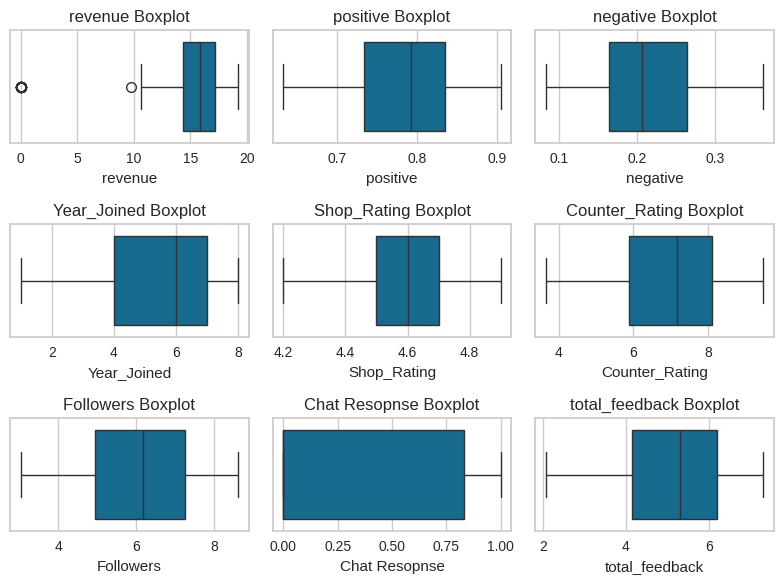

In [48]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(8, 6))
for i, j in enumerate(df_copy_temp_log.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df_copy_temp_log[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

In [49]:
# Xác định ngưỡng để loại bỏ giá trị bất thường bằng IQR (Interquartile Range)
Q1 = df_copy_temp_log['revenue'].quantile(0.25)
Q3 = df_copy_temp_log['revenue'].quantile(0.75)
IQR = Q3 - Q1

# Định nghĩa giá trị giới hạn
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loại bỏ các giá trị bất thường
df_copy_temp_log = df_copy_temp_log[(df_copy_temp_log['revenue'] >= lower_bound) & (df_copy_temp_log['revenue'] <= upper_bound)]

# Hiển thị kết quả sau khi loại bỏ
df_copy_temp_log


,Name_Shop,revenue,positive,negative,Year_Joined,Shop_Rating,Counter_Rating,Followers,Chat Resopnse,total_feedback
0,2N Unisex,14.097678,0.835125,0.164875,5,4.7,7.003974,6.890609,0.00,5.634790
1,3M Automotive Official,17.055972,0.750000,0.250000,4,4.7,7.244942,7.313887,0.00,6.033086
2,5S FASHION,16.120393,0.904762,0.083333,6,4.7,9.472782,8.600799,1.00,3.091042
3,5Star,14.962372,0.781883,0.218117,7,4.4,8.389587,6.173786,0.00,6.733402
4,60s Watch,15.698329,0.818088,0.181912,6,4.6,8.497195,6.338594,1.00,6.881411
...,...,...,...,...,...,...,...,...,...,...
939,Phụ Kiện Đời Sống,18.234255,0.672956,0.327044,4,4.3,7.972811,5.283204,1.00,5.075174
940,Photodesign VN Official,18.030301,0.752226,0.247774,5,4.6,9.305741,8.049427,0.91,6.514713
941,Nhà Chíp,16.683978,0.759146,0.240854,3,4.6,8.006701,6.761573,0.93,5.796058
942,Mishio Kachi Official,18.735331,0.783661,0.216339,3,4.5,8.779711,8.584665,0.00,6.495266


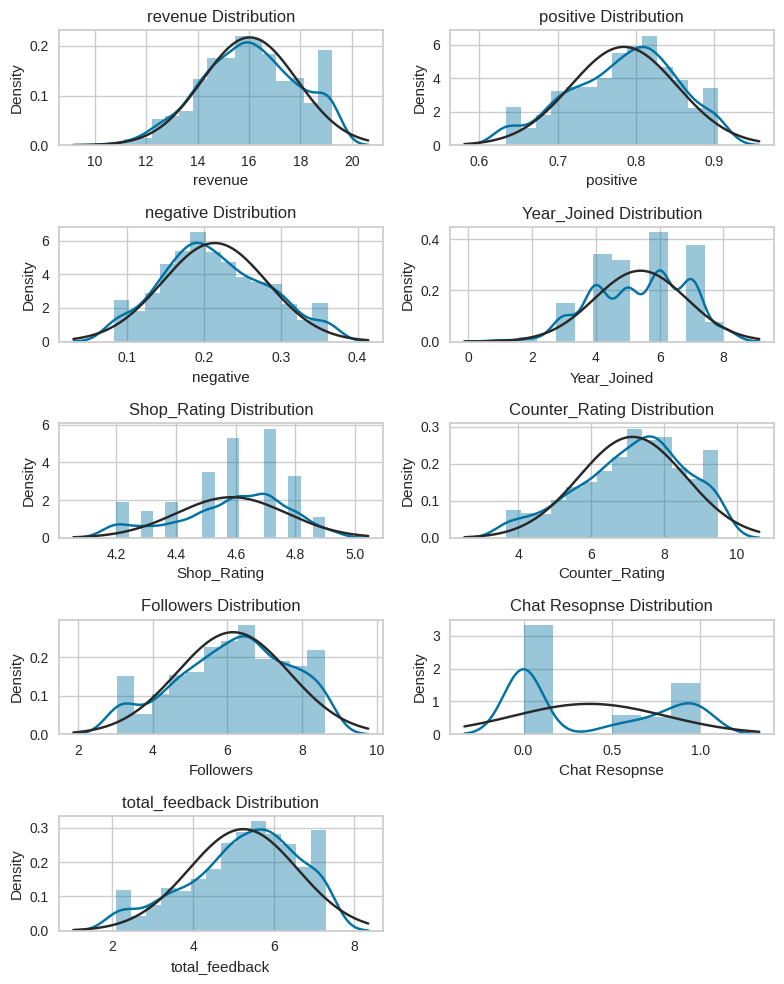

In [50]:
# Visualize the distribution of each variable.
plt.figure(figsize=(8, 10))
for i, j in enumerate(df_copy_temp_log.describe().columns):
    plt.subplot(5,2, i+1)
    sns.distplot(x=df_copy_temp_log[j], fit = stats.norm)
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.tight_layout()
plt.show()


# ***`Standard Scaler`***

In [51]:
df_copy_temp_log.iloc[:, 1:]

,revenue,positive,negative,Year_Joined,Shop_Rating,Counter_Rating,Followers,Chat Resopnse,total_feedback
0,14.097678,0.835125,0.164875,5,4.7,7.003974,6.890609,0.00,5.634790
1,17.055972,0.750000,0.250000,4,4.7,7.244942,7.313887,0.00,6.033086
2,16.120393,0.904762,0.083333,6,4.7,9.472782,8.600799,1.00,3.091042
3,14.962372,0.781883,0.218117,7,4.4,8.389587,6.173786,0.00,6.733402
4,15.698329,0.818088,0.181912,6,4.6,8.497195,6.338594,1.00,6.881411
...,...,...,...,...,...,...,...,...,...
939,18.234255,0.672956,0.327044,4,4.3,7.972811,5.283204,1.00,5.075174
940,18.030301,0.752226,0.247774,5,4.6,9.305741,8.049427,0.91,6.514713
941,16.683978,0.759146,0.240854,3,4.6,8.006701,6.761573,0.93,5.796058
942,18.735331,0.783661,0.216339,3,4.5,8.779711,8.584665,0.00,6.495266


In [52]:
# Khởi tạo StandardScaler
scaler = StandardScaler()

# Chuẩn hóa dữ liệu
scaled_data = scaler.fit_transform(df_copy_temp_log.drop(columns = ['Name_Shop']))
scaled_df = pd.DataFrame(scaled_data, columns=df_copy_temp_log.drop(columns=['Name_Shop']).columns)
print(scaled_df)

      revenue  positive  negative  Year_Joined  Shop_Rating  Counter_Rating  \
0   -1.053597  0.747030 -0.726986    -0.276919     0.615991       -0.087966   
1    0.557329 -0.508562  0.525103    -0.970426     0.615991        0.076500   
2    0.047864  1.774161 -1.926356     0.416589     0.615991        1.597059   
3   -0.582732 -0.038288  0.056141     1.110096    -1.007126        0.857751   
4   -0.181970  0.495735 -0.476392     0.416589     0.074952        0.931196   
..        ...       ...       ...          ...          ...             ...   
854  1.198958 -1.644953  1.658325    -0.970426    -1.548165        0.573290   
855  1.087895 -0.475735  0.492369    -0.276919     0.074952        1.483050   
856  0.354761 -0.373654  0.390572    -1.663933     0.074952        0.596421   
857  1.471816 -0.012063  0.029990    -1.663933    -0.466087        1.124021   
858  0.078805 -2.227158  2.159410    -1.663933    -2.089204        0.931196   

     Followers  Chat Resopnse  total_feedback  
0  

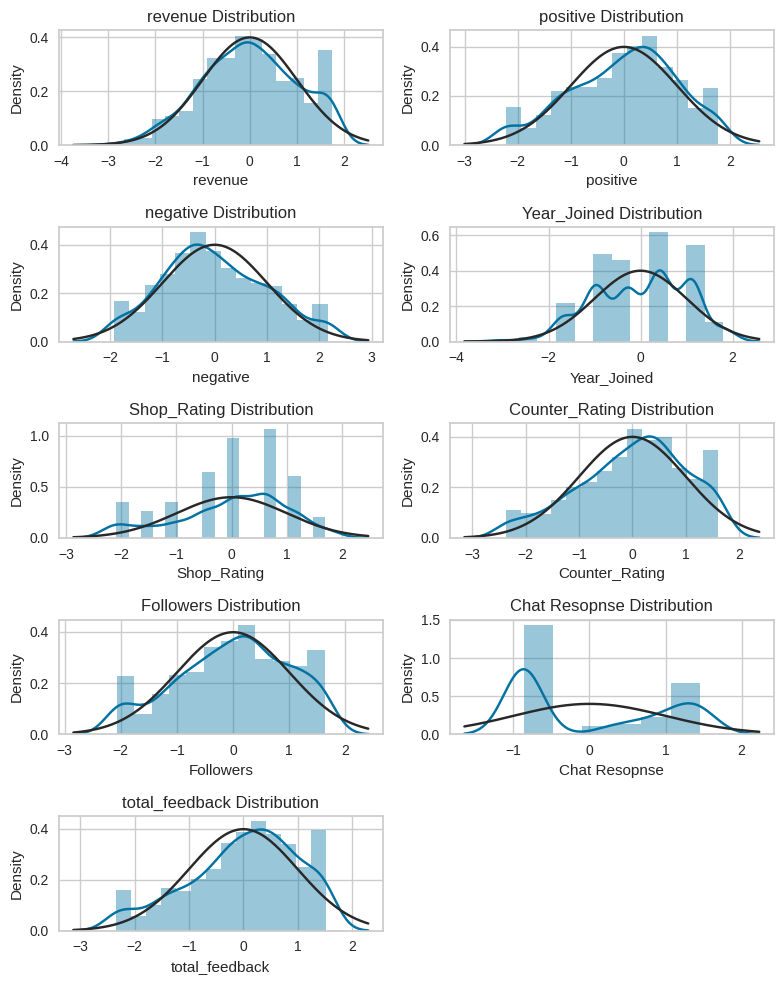

In [53]:
# Visualize the distribution of each variable.
plt.figure(figsize=(8, 10))
for i, j in enumerate(scaled_df.describe().columns):
    plt.subplot(5,2, i+1)
    sns.distplot(x=scaled_df[j], fit = stats.norm)
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.tight_layout()
plt.show()


# ***`Elbow + KMeans +DBSCAN`***

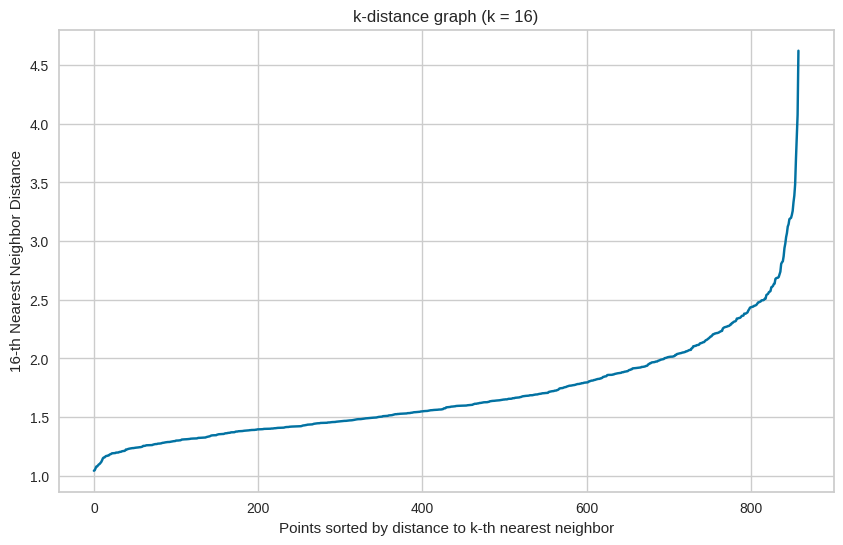

In [54]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

X = df_copy_temp_log.drop(columns = ['Name_Shop'])

# Bước 1: Chọn giá trị min_samples (minpts) - thường là 5 hoặc 10 tùy thuộc vào dữ liệu
min_samples = 16  # Giá trị thử nghiệm

# Bước 2: Tính toán khoảng cách đến min_samples lân cận gần nhất
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sắp xếp các khoảng cách để tìm "góc gãy" trên đồ thị
distances = np.sort(distances[:, min_samples - 1])  # Chọn khoảng cách đến điểm lân cận thứ min_samples

# Bước 3: Vẽ đồ thị k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title(f'k-distance graph (k = {min_samples})')
plt.xlabel("Points sorted by distance to k-th nearest neighbor")
plt.ylabel(f"{min_samples}-th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


In [56]:
# Bước 1: Áp dụng DBSCAN
dbscan = DBSCAN(eps=2.3, min_samples=16)
dbscan_labels = dbscan.fit_predict(X)

# Count the number of clusters and noise points
unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
clusters_info = dict(zip(unique_labels, counts))


clusters_info


{-1: 16, 0: 843}

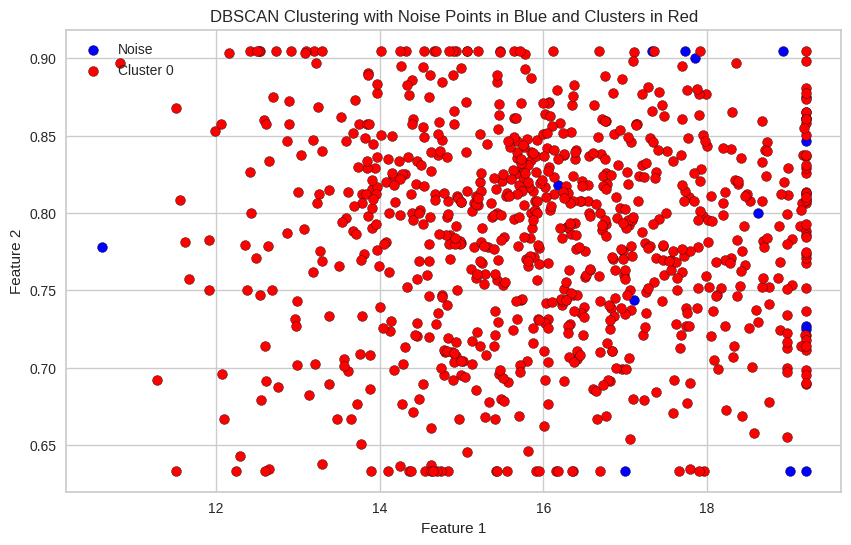

In [57]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

# Visualize clusters and noise
plt.figure(figsize=(10, 6))

# Lặp qua các nhãn và vẽ từng cụm với màu sắc tương ứng
for label in unique_labels:
    if label == -1:
        # Điểm nhiễu có nhãn -1
        color = 'blue'
        label_name = 'Noise'
    else:
        # Các cụm có nhãn khác -1
        color = 'red'
        label_name = f'Cluster {label}'

    # Get the data points for the current label using .iloc
    cluster_points = X.iloc[dbscan_labels == label]

    # Access the first and second columns using their numerical index (0 and 1)
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1],
                c=color, label=label_name, edgecolor='k', s=50)

# Thêm tiêu đề và chú thích
plt.title("DBSCAN Clustering with Noise Points in Blue and Clusters in Red")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Số cụm: 2, Chỉ số Silhouette trung bình: 0.3098
Số cụm: 3, Chỉ số Silhouette trung bình: 0.2212
Số cụm: 4, Chỉ số Silhouette trung bình: 0.2228
Số cụm: 5, Chỉ số Silhouette trung bình: 0.1906
Số cụm: 6, Chỉ số Silhouette trung bình: 0.1996
Số cụm: 7, Chỉ số Silhouette trung bình: 0.1924
Số cụm: 8, Chỉ số Silhouette trung bình: 0.1898
Số cụm: 9, Chỉ số Silhouette trung bình: 0.1964
Số cụm: 10, Chỉ số Silhouette trung bình: 0.1968
Số cụm: 11, Chỉ số Silhouette trung bình: 0.1963


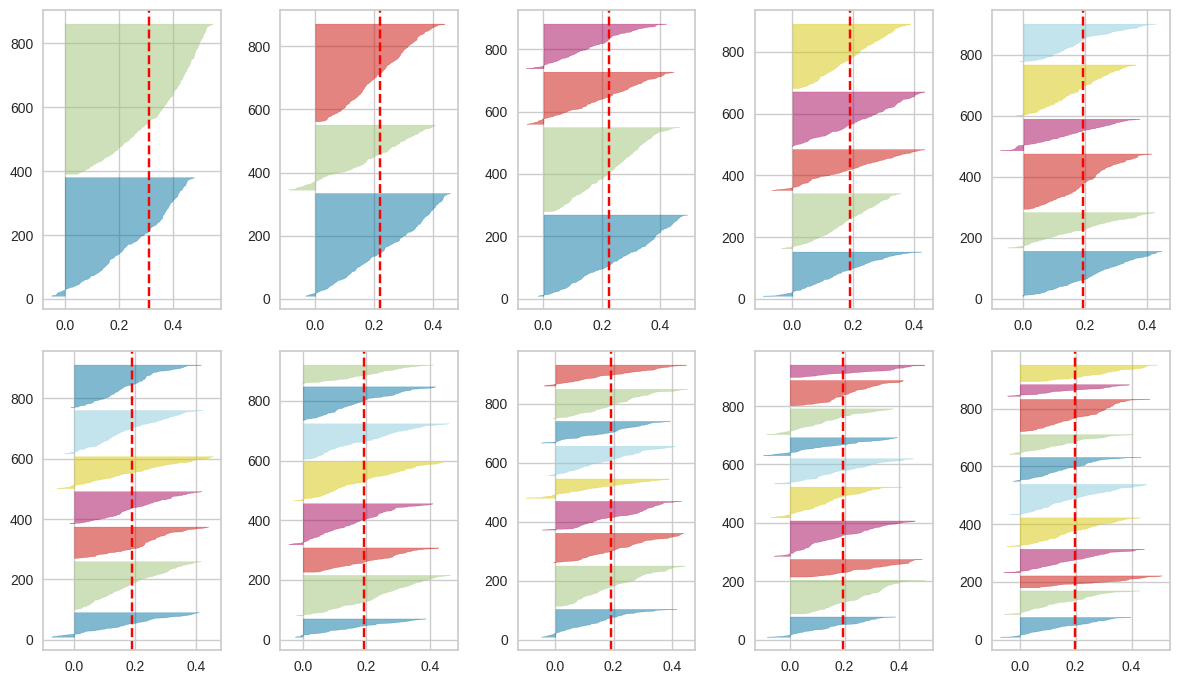

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

# Loại bỏ các điểm nhiễu (noise), tức là các điểm có nhãn -1
non_noise_mask = dbscan_labels != -1
X_non_noise = X[non_noise_mask]

fig, ax = plt.subplots(2, 5, figsize=(12, 7))  # Create a 2x5 grid of subplots
ax = ax.flatten()  # Flatten the 2D array of axes into a 1D array

for i, k in enumerate([2, 3, 4, 5, 6, 7, 8, 9, 10, 11]):
    km = KMeans(n_clusters=k, init='random', n_init='auto')

    # Use the flattened index to access the correct subplot
    visualizer_sil = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[i])
    visualizer_sil.fit(X_non_noise)

    # Tính và in ra chỉ số Silhouette trung bình
    cluster_labels = km.fit_predict(X_non_noise)
    silhouette_avg = silhouette_score(X_non_noise, cluster_labels)
    print(f"Số cụm: {k}, Chỉ số Silhouette trung bình: {silhouette_avg:.4f}")

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

Silhouette Score sau K-Means: 0.3101490948955307


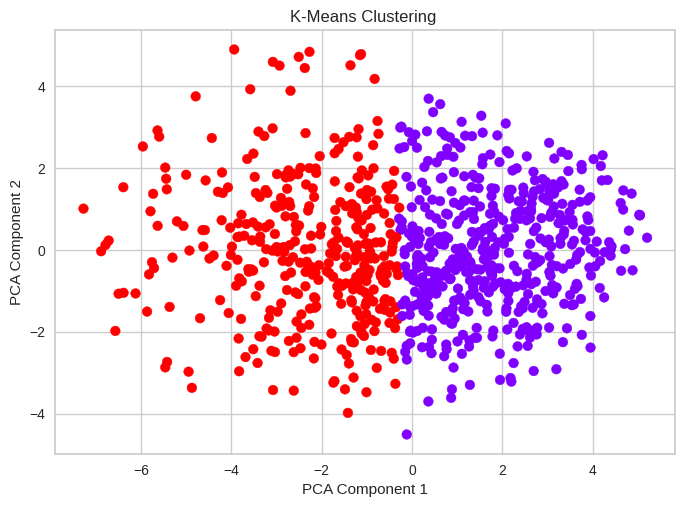

In [59]:

# Áp dụng K-Means dựa trên số lượng cụm của BIRCH
kmeans_model = KMeans(n_clusters=2, random_state=42)

# Huấn luyện K-Means với dữ liệu gốc
kmeans_labels = kmeans_model.fit_predict(X_non_noise)

# Tính toán Silhouette Score cho đánh giá phân cụm sau K-Means
silhouette_avg_kmeans = silhouette_score(X_non_noise, kmeans_labels)
print(f'Silhouette Score sau K-Means: {silhouette_avg_kmeans}')

# Giảm chiều dữ liệu bằng PCA để trực quan hóa
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_non_noise)

# Vẽ biểu đồ phân cụm từ kết quả K-Means
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('K-Means Clustering ')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Silhouette Score sau K-Means: 0.3101490948955307


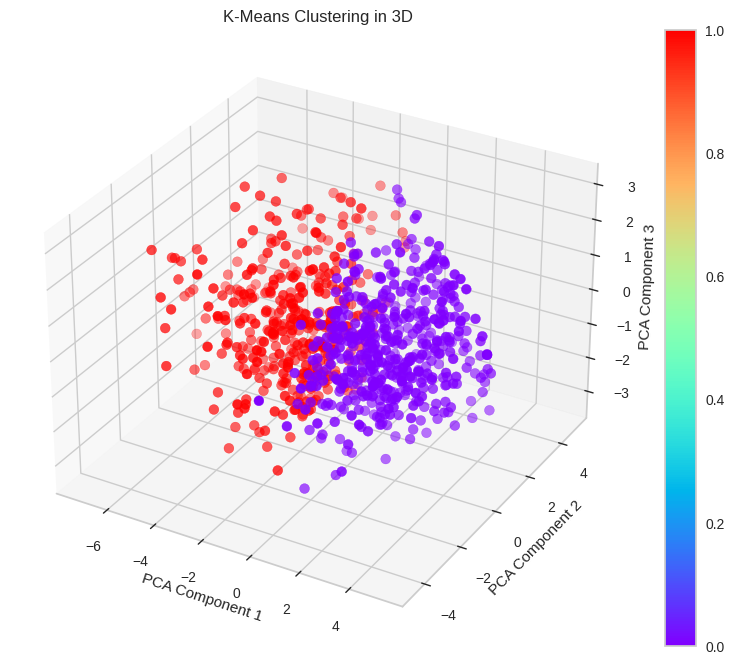

In [60]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Áp dụng K-Means dựa trên số lượng cụm của BIRCH
kmeans_model = KMeans(n_clusters=2, random_state=42)

# Huấn luyện K-Means với dữ liệu gốc
kmeans_labels = kmeans_model.fit_predict(X_non_noise)

# Tính toán Silhouette Score cho đánh giá phân cụm sau K-Means
silhouette_avg_kmeans = silhouette_score(X_non_noise, kmeans_labels)
print(f'Silhouette Score sau K-Means: {silhouette_avg_kmeans}')

# Giảm chiều dữ liệu bằng PCA xuống 3D để trực quan hóa
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(X_non_noise)

# Vẽ biểu đồ phân cụm từ kết quả K-Means trong không gian 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2],
                c=kmeans_labels, cmap='rainbow', s=50)

# Đặt tiêu đề và nhãn cho các trục
ax.set_title('K-Means Clustering in 3D')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Thêm color bar
plt.colorbar(sc)
plt.show()
